## Reverse Filter Code

Written in Python3.
Reverses filtering effect of 7 filters 

In [121]:
#python3
#libraries required are opencv, numpy, matplotlib, skimage, os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import exposure
import os
from skimage.measure import compare_psnr
#from skimage.f import tv_denoise
filters="gaussian bilateral gamma guided AMF median avg LOs".split()  #list of filters implemented
iter_=[]
psnr_list=[]
results_list=[]



In [122]:
#PSNR - Peak Signal to Noise Ratio, a measure of the difference between two images. 
#Higher the value more similar are the two images 
def PSNR(img1, img2):
    img1=np.uint8(img1)
    img2=np.uint8(img2) 
    #mse = np.mean((img1 - img2)**2)      #MSE         
    mse=np.linalg.norm(img1-img2)
    if mse == 0:
        return 100                     #psnr is infinite as both the images are same
    return 20*math.log10((255)/math.sqrt(mse))      #formula for PSNR


#to normalize the overflown pixel values to range [0,255]
def normalize(img):           
    img=np.float32(img)
    if img.min()>=0:
        if img.max()<=255:
            return np.uint8(img)
    tmp=np.add(img,-1.0*img.min())
    tmp1=np.divide(tmp,tmp.max())
    tmp2=np.multiply(tmp1,255)
    tmp3=np.uint8(tmp2)
    return tmp3


#Reverse Filtering function
def Reverse(original_image,blurred_image, N, filtr):    #N- no. of iterations for the algorithm 
    im=original_image
    J=np.float32(blurred_image)
    X=J               
    global iter_,results_list,psnr_list
    iter_=[]
    psnr_list=[]
    results_list=[]
    psnr_list.append(compare_psnr(im,normalize(X)))
    results_list.append(normalize(X))
    iter_.append(0)
    
    for i in range(N):
        #J_=f(X)
        iter_.append(i+1)
        if filtr=="gaussian":
            X=X+J-cv.GaussianBlur(normalize(X),(25,25), 2)
        elif filtr=="bilateral":
            X = X+J-cv.bilateralFilter(normalize(X),35,75,75)
        elif filtr=="gamma":
            X=X+J-exposure.adjust_gamma(normalize(X), 2)
        elif filtr=="guided":
            X=X+J-cv.ximgproc.guidedFilter(cv.GaussianBlur(im,(15,15), 2), normalize(X), 80, 500)
        elif filtr=="AMF":
            X=X+J-cv.ximgproc.amFilter(normalize(im),normalize(X),5,0.5) 
        elif filtr=="avg":
            X=X+J-cv.blur(normalize(X),(11,11))
        elif filtr=="median":
            X=X+J-cv.medianBlur(normalize(X),5)
        elif filtr=="LOs":
            X=X+J-cv.ximgproc.l0Smooth(normalize(X))
        else:
            print("Filter not found. Returning the original image...")
            break
            
        
        #psnr_list.append(PSNR(im,normalize(X)))
        psnr_list.append(compare_psnr(im,normalize(X)))
        results_list.append(normalize(X))
    
    final_img=normalize(X)
    return final_img


In [133]:

#######################   main.py   ########################
im=cv.imread('bird.png') 

#J=cv.bilateralFilter(im,35,75,75)                                          #1. bilateral filter
#J=cv.GaussianBlur(im,(25,25),2)                                            #2. gaussian blur
J = exposure.adjust_gamma(im, 2)                                            #3. Gamma Correction
#J=cv.ximgproc.amFilter(im,im,5,0.5)                                        #4. AdaptiveManifoldFilter
#J=cv.ximgproc.guidedFilter(cv.GaussianBlur(im,(15,15),2) , im, 80, 500)    #5. Guided Filter
#J=cv2.blur(im,(5,5))                                                       #6. average blur
#J =cv.medianBlur(im,5)                                                     #7. median filter
#J=cv.ximgproc.l0Smooth(normalize(im))
X_=Reverse(im,J,50,'gamma')

#cv.imwrite('Reverse_bird.jpg',X_)
#cv.imwrite('Filtered.jpg',J)
#cv.imwrite('BLurred_bird.jpg',J)

print("PSNR(Original Image, Reversed Image) :",compare_psnr(im,X_))
print("PSNR(Original Image, Blurred Image) :",compare_psnr(im,J))

PSNR(Original Image, Reversed Image) : 46.38338893599339
PSNR(Original Image, Blurred Image) : 13.994171648583734


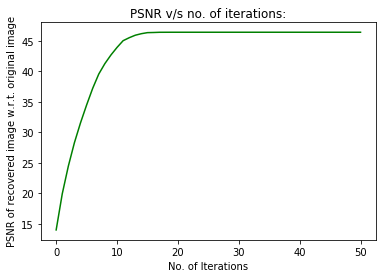

In [134]:
x=np.array(iter_)
y=np.array(psnr_list)
plt.plot(x,y,'g')
plt.xlabel("No. of Iterations")
plt.ylabel("PSNR of recovered image w.r.t. original image")
plt.title("PSNR v/s no. of iterations:")
plt.show()

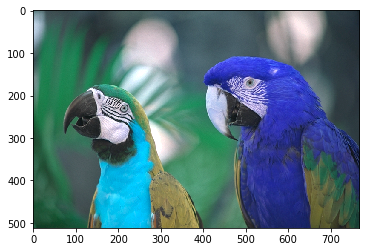

In [135]:
plt.imshow(X_)        #Output Image 

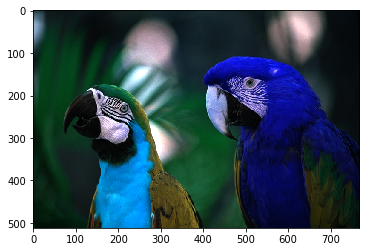

In [136]:
plt.imshow(J)    #blurred image

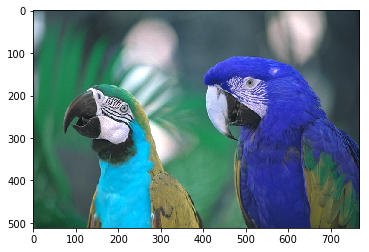

In [77]:
plt.imshow(im) # original image

In [126]:
#code used to run on dataset to prodce results
'''for filtr in filters[-1:]:
    for i,j,k in os.walk("Image_Dataset/BSDS300/images/test"):
        for fil in k:
            im=cv.imread("Image_Dataset/BSDS300/images/test/"+fil)
            J=im
            if filtr=="gaussian":
                J=cv.GaussianBlur(im,(25,25), 2)
            elif filtr=="bilateral":
                J=cv.bilateralFilter(im,35,75,75)
            elif filtr=="gamma":
                J=exposure.adjust_gamma(im, 2)
            elif filtr=="guided":
                J=cv.ximgproc.guidedFilter(cv.GaussianBlur(im,(15,15),2) , im, 80, 500)
            elif filtr=="AMF":
                J=cv.ximgproc.amFilter(im,im,5,0.5) 
            elif filtr=="avg":
                J=cv.blur(im,(11,11))
            elif filtr=="median":
                J=cv.medianBlur(im,5)
            elif filtr=="LOs":
                J=cv.ximgproc.l0Smooth(im)
            try:
                os.makedirs("Blurred_Img_Dataset/"+filtr)
            except:
                pass
            cv.imwrite("Blurred_Img_Dataset/"+filtr+"/"+fil,J)
            result=Reverse(im,J,50,filtr)
            try:
                os.makedirs("Results/"+filtr)
            except:
                pass
            cv.imwrite("Results/"+filtr+"/"+fil,result)
                
'''